In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import plotly.graph_objects as go
import time as time
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

warnings.filterwarnings('ignore')

# Задание 1
Найти данные для кластеризации. Внимание, если признаки в данных имеют
очень сильно разные масштабы, то необходимо данные предварительно нормализовать.

In [5]:
data = pd.read_csv("CARS_1.csv", sep=",")
data.dropna(inplace=True)
data.isnull().sum()
data.drop(['car_name'], axis=1, inplace=True)

data.replace({'fuel_type': {'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4}}, inplace=True)
data.replace({'transmission_type': {'Manual': 0, 'Automatic': 1, 'Electric': 2}}, inplace=True)
data.replace({'body_type': {'Hatchback': 0, 'Sedan': 1, 'SUV': 2, 'MPV': 3, 'Coupe': 4, 'Convertible': 5, 'Wagon': 6,
                            'Van': 7, 'Pickup': 8, 'Other': 9, 'MUV': 10, 'Hybrid': 11, 'Pickup Truck': 12,
                            'Luxury': 13, 'Minivan': 14}}, inplace=True)

print(data['transmission_type'].unique())
print(data['body_type'].unique())
print(data['fuel_type'].unique())

scaler = preprocessing.MinMaxScaler()
D = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
D

[1 0 2]
[ 0  2 10  1 11 14 12  4  5 13  6]
[1 0 2 4]


,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,0.020912,0.25,0.147852,0.250000,0.500000,0.5,0.27,0.000000,0.75,0.000854,0.002477,0.072617,0.500000,0.070604,0.647059
1,0.035550,0.25,0.216593,0.333333,0.500000,0.5,0.48,0.142857,0.75,0.006547,0.011546,0.120231,0.628571,0.116816,0.705882
2,0.100795,0.00,0.323556,0.333333,0.333333,0.5,0.57,0.142857,0.75,0.014432,0.013856,0.282797,0.400000,0.153269,0.441176
3,0.130489,0.00,0.325630,0.333333,0.833333,0.5,0.60,0.142857,0.75,0.013934,0.023394,0.432214,0.400000,0.220619,0.411765
4,0.044333,0.00,0.325630,0.333333,0.833333,0.5,0.57,0.142857,0.75,0.012240,0.022635,0.382409,0.392857,0.207851,0.411765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.014220,0.25,0.294963,0.333333,0.500000,0.5,0.00,0.000000,0.75,0.004554,0.007117,0.482020,0.750000,0.520637,0.794118
198,0.000836,0.25,0.296000,0.333333,0.500000,0.5,0.59,0.071429,0.75,0.009991,0.007586,0.382409,0.628571,0.313725,0.588235
199,0.000418,0.00,0.289778,0.333333,0.833333,0.0,0.60,0.142857,0.75,0.018161,0.019121,0.332603,0.357143,0.201705,0.441176
200,0.003346,0.25,0.592296,0.666667,0.500000,0.5,0.85,0.142857,0.25,0.304024,0.238055,0.780855,0.642857,0.746528,0.705882


# Задание 2
Провести кластеризацию данных с помощью алгоритма k-means. Использовать «правило локтя»
и коэффициент силуэта для поиска оптимального количества кластеров.

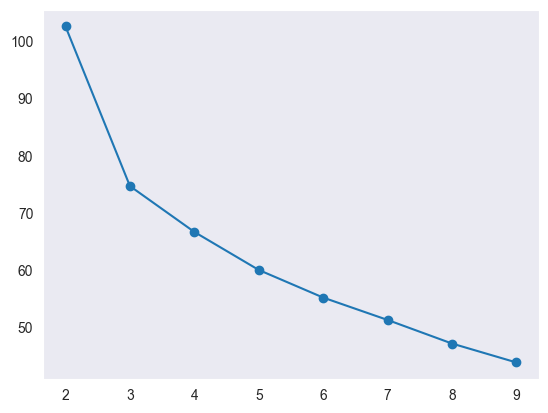

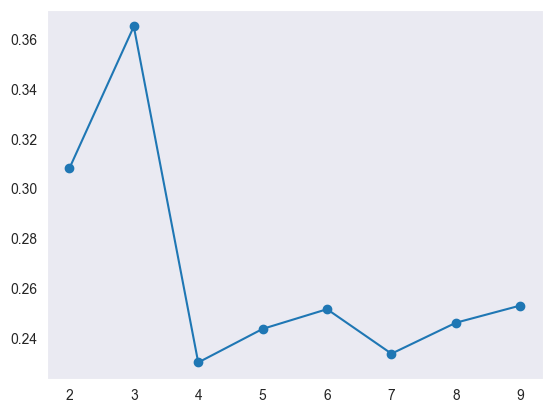

In [6]:
models = []
score1 = []
score2 = []

for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=123, init='k-means++').fit(D)
    models.append(model)
    score1.append(model.inertia_)
    score2.append(silhouette_score(D, model.labels_))

plt.grid()
plt.plot(range(2, 10), score1, marker='o')
plt.show()

plt.grid()
plt.plot(range(2, 10), score2, marker='o')
plt.show()

# Задание 3

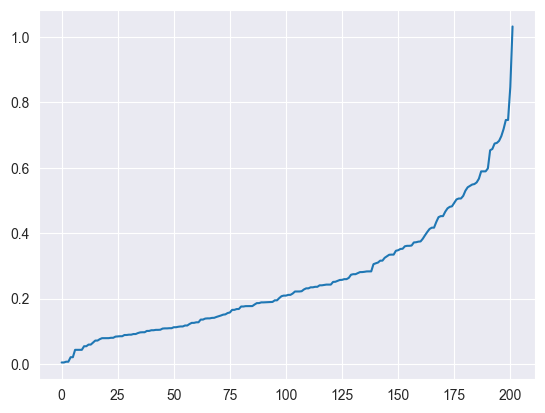

In [7]:
#Кластеры
start = time.time()
model = KMeans(n_clusters=3, random_state=123, init='k-means++').fit(D)
kmeans_time = time.time() - start
D_Kmeans = D.copy()
D_Kmeans['cluster'] = model.labels_

#Алгоритм иерархической кластеризации
start = time.time()
model2 = AgglomerativeClustering(n_clusters=3, compute_distances=True)
clastering = model2.fit(D)
agglomerative_time = time.time() - start
D_Agglomerative = D.copy()
D_Agglomerative['cluster'] = clastering.labels_

#Находим eps для DBSCAN: находим максимальную кривизну графика расстояний
#Найти максимальную кривизну графика расстояний
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(D)
distances, indices = nbrs.kneighbors(D)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.show()

# Задание 4

In [8]:
start = time.time()
model3 = DBSCAN(eps=0.5, min_samples=5)
clastering = model3.fit(D)
DBSCAN_time = time.time() - start
D_DBSCAN = D.copy()
D_DBSCAN['cluster'] = clastering.labels_

# Задание 5

In [9]:
data = {'Kmeans': [kmeans_time], 'Иерархическая кластеризация': [agglomerative_time], 'DBSCAN': [DBSCAN_time]}
df = pd.DataFrame(data, columns=['Kmeans', 'Иерархическая кластеризация', 'DBSCAN'])
df

,Kmeans,Иерархическая кластеризация,DBSCAN
0,0.031131,0.004807,0.005136


# Задание 6

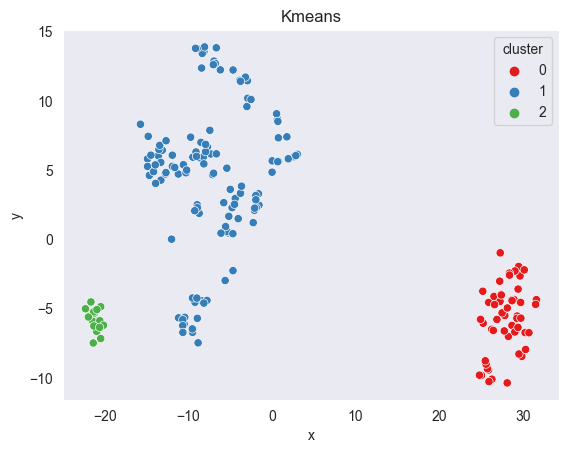

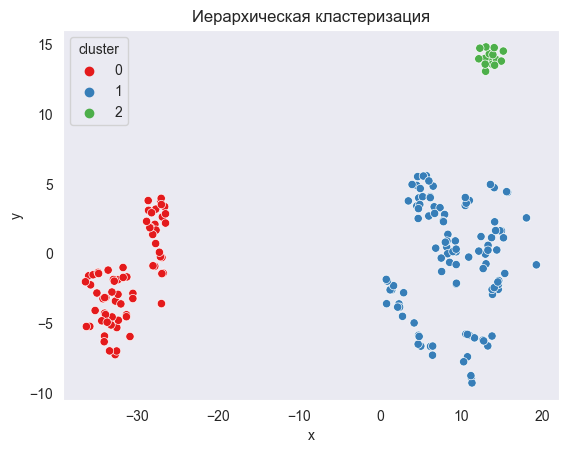

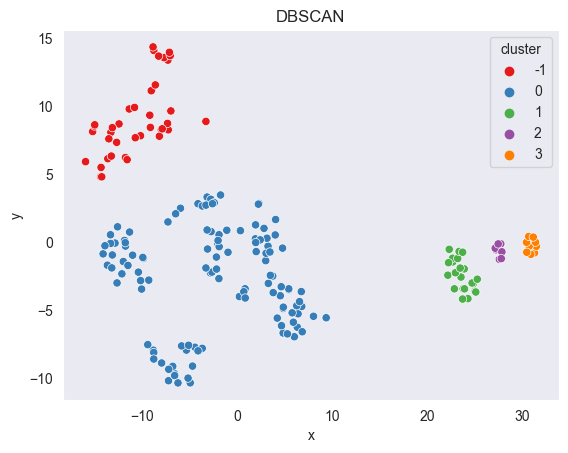

In [10]:
perplexity = 25

T = TSNE(n_components=2, random_state=123, perplexity=perplexity)
TSNE_features = T.fit_transform(D_Kmeans)
t_data = D_Kmeans.copy()
t_data['x'] = TSNE_features[:, 0]
t_data['y'] = TSNE_features[:, 1]
fig = plt.figure()
plt.grid()
sns.scatterplot(x='x', y='y', hue='cluster', data=t_data, palette='Set1')
plt.title('Kmeans')
plt.show()

T = TSNE(n_components=2, random_state=123, perplexity=perplexity)
TSNE_features = T.fit_transform(D_Agglomerative)
t_data = D_Agglomerative.copy()
t_data['x'] = TSNE_features[:, 0]
t_data['y'] = TSNE_features[:, 1]
fig = plt.figure()
plt.grid()
sns.scatterplot(x='x', y='y', hue='cluster', data=t_data, palette='Set1')
plt.title('Иерархическая кластеризация')
plt.show()

T = TSNE(n_components=2, random_state=123, perplexity=perplexity)
TSNE_features = T.fit_transform(D_DBSCAN)
t_data = D_DBSCAN.copy()
t_data['x'] = TSNE_features[:, 0]
t_data['y'] = TSNE_features[:, 1]
fig = plt.figure()
plt.grid()
sns.scatterplot(x='x', y='y', hue='cluster', data=t_data, palette='Set1')
plt.title('DBSCAN')
plt.show()